# 1

In [44]:
import json
from pprint import pprint

data = json.load(open('reduced_dblp.json'))

pprint(data)

[{'authors': [{'author': 'h&eacute;lio marcos paz de almeida',
               'author_id': 255206},
              {'author': 'dorgival olavo guedes neto', 'author_id': 255207},
              {'author': 'wagner meira jr.', 'author_id': 16585},
              {'author': 'mohammed j. zaki', 'author_id': 255208}],
  'id_conference': 'conf/pkdd/2011-1',
  'id_conference_int': 3052,
  'id_publication': 'conf/pkdd/almeidanmz11',
  'id_publication_int': 161535,
  'title': 'is there a best quality metric for graph clusters?'},
 {'authors': [{'author': 'beno&icirc;t fr&eacute;nay', 'author_id': 255280},
              {'author': 'gael de lannoy', 'author_id': 255281},
              {'author': 'michel verleysen', 'author_id': 3326}],
  'id_conference': 'conf/pkdd/2011-1',
  'id_conference_int': 3052,
  'id_publication': 'conf/pkdd/frenaylv11',
  'id_publication_int': 161584,
  'title': 'label noise-tolerant hidden markov models for segmentation: '
           'application to ecgs.'},
 {'authors': [{

  'id_conference_int': 3345,
  'id_publication': 'conf/sigmod/mytilinisgkdttg15',
  'id_publication_int': 175776,
  'title': 'modissense: a distributed spatio-temporal and textual processing '
           'platform for social networking services.'},
 {'authors': [{'author': 'lijun chang', 'author_id': 16487},
              {'author': 'xuemin lin', 'author_id': 15839},
              {'author': 'lu qin', 'author_id': 16486},
              {'author': 'jeffrey xu yu', 'author_id': 15850},
              {'author': 'wenjie zhang', 'author_id': 15841}],
  'id_conference': 'conf/sigmod/2015',
  'id_conference_int': 3345,
  'id_publication': 'conf/sigmod/changlqyz15',
  'id_publication_int': 175779,
  'title': 'index-based optimal algorithms for computing steiner components '
           'with maximum connectivity.'},
 {'authors': [{'author': 'furong li', 'author_id': 16049},
              {'author': 'mong-li lee', 'author_id': 16045},
              {'author': 'wynne hsu', 'author_id': 16050},
  

              {'author': 'songbo tan', 'author_id': 364879},
              {'author': 'xueqi cheng', 'author_id': 11901},
              {'author': 'xiao-chun yun', 'author_id': 68834}],
  'id_conference': 'conf/wsdm/2010',
  'id_conference_int': 4634,
  'id_publication': 'conf/wsdm/dutcy10',
  'id_publication_int': 254113,
  'title': 'adapting information bottleneck method for automatic construction '
           'of domain-oriented sentiment lexicon.'},
 {'authors': [{'author': 'anirban dasgupta 0001', 'author_id': 283530},
              {'author': 'maxim gurevich', 'author_id': 364973},
              {'author': 'kunal punera', 'author_id': 365015}],
  'id_conference': 'conf/wsdm/2011',
  'id_conference_int': 4627,
  'id_publication': 'conf/wsdm/dasguptagp11',
  'id_publication_int': 254118,
  'title': 'enhanced email spam filtering through combining similarity '
           'graphs.'},
 {'authors': [{'author': 'christian kohlsch&uuml;tter', 'author_id': 365111},
              {'author'

  'id_conference_int': 6344,
  'id_publication': 'conf/innovations/cormodemt12',
  'id_publication_int': 354307,
  'title': 'practical verified computation with streaming interactive proofs.'},
 {'authors': [{'author': 'michael viderman', 'author_id': 207889}],
  'id_conference': 'conf/innovations/2012',
  'id_conference_int': 6344,
  'id_publication': 'conf/innovations/viderman12',
  'id_publication_int': 354321,
  'title': 'linear time decoding of regular expander codes.'},
 {'authors': [{'author': 'kobbi nissim', 'author_id': 218971},
              {'author': 'rann smorodinsky', 'author_id': 461808},
              {'author': 'moshe tennenholtz', 'author_id': 5620}],
  'id_conference': 'conf/innovations/2012',
  'id_conference_int': 6344,
  'id_publication': 'conf/innovations/nissimst12',
  'id_publication_int': 354322,
  'title': 'approximately optimal mechanism design via differential privacy.'},
 {'authors': [{'author': 'bill fefferman', 'author_id': 452784},
              {'autho

 {'authors': [{'author': 'alois paulin', 'author_id': 28584}],
  'id_conference': 'conf/www/2015c',
  'id_conference_int': 7595,
  'id_publication': 'conf/www/paulin15',
  'id_publication_int': 425094,
  'title': "smart cities governance informatability?: let's first understand "
           'the atoms.'},
 {'authors': [{'author': 'paolo boldi', 'author_id': 396787}],
  'id_conference': 'conf/www/2015c',
  'id_conference_int': 7595,
  'id_publication': 'conf/www/boldi15',
  'id_publication_int': 425099,
  'title': 'large-scale network analytics: diffusion-based computation of '
           'distances and geometric centralities.'},
 {'authors': [{'author': 'min-joong lee', 'author_id': 118559},
              {'author': 'jungmin lee', 'author_id': 523184},
              {'author': 'jaimie yejean park', 'author_id': 451038},
              {'author': 'ryan hyun choi', 'author_id': 523185},
              {'author': 'chin-wan chung', 'author_id': 19119}],
  'id_conference': 'conf/www/2012',
  

 {'authors': [{'author': 'weiwei feng', 'author_id': 523795},
              {'author': 'peng wang', 'author_id': 12863},
              {'author': 'chuan zhou', 'author_id': 80048},
              {'author': 'li guo 0001', 'author_id': 2514},
              {'author': 'peng zhang 0001', 'author_id': 2512}],
  'id_conference': 'conf/www/2015c',
  'id_conference_int': 7595,
  'id_publication': 'conf/www/fengwzgz15',
  'id_publication_int': 426230,
  'title': 'fast search for distance dependent chinese restaurant processes.'},
 {'authors': [{'author': 'haipeng zhang', 'author_id': 228620},
              {'author': 'mohammed korayem', 'author_id': 115432},
              {'author': 'david j. crandall', 'author_id': 72867},
              {'author': 'gretchen lebuhn', 'author_id': 523796}],
  'id_conference': 'conf/www/2012',
  'id_conference_int': 7601,
  'id_publication': 'conf/www/zhangkcl12',
  'id_publication_int': 426236,
  'title': 'mining photo-sharing websites to study ecological phenom

  'id_conference': 'conf/www/2015c',
  'id_conference_int': 7595,
  'id_publication': 'conf/www/zablith15',
  'id_publication_int': 426898,
  'title': 'interconnecting and enriching higher education programs using '
           'linked data.'},
 {'authors': [{'author': 'asmelash teka hadgu', 'author_id': 275498}],
  'id_conference': 'conf/www/2015c',
  'id_conference_int': 7595,
  'id_publication': 'conf/www/hadgu15',
  'id_publication_int': 426899,
  'title': 'mining scholarly communication and interaction on the social web.'},
 {'authors': [{'author': 'kevin j. lang', 'author_id': 365141},
              {'author': 'benjamin moseley', 'author_id': 143817},
              {'author': 'sergei vassilvitskii', 'author_id': 272748}],
  'id_conference': 'conf/www/2012',
  'id_conference_int': 7601,
  'id_publication': 'conf/www/langmv12',
  'id_publication_int': 426905,
  'title': 'handling forecast errors while bidding for display advertising.'},
 {'authors': [{'author': 'stefano cresci', 'au

 {'authors': [{'author': 'loukas georgiadis', 'author_id': 205088}],
  'id_conference': 'conf/icalp/2010-1',
  'id_conference_int': 8976,
  'id_publication': 'conf/icalp/georgiadis10',
  'id_publication_int': 487062,
  'title': 'testing 2-vertex connectivity and computing pairs of '
           'vertex-disjoint <i>s</i>-<i>t</i> paths in digraphs.'},
 {'authors': [{'author': 'juanjo ru&eacute;', 'author_id': 569711},
              {'author': 'ignasi sau', 'author_id': 124731},
              {'author': 'dimitrios m. thilikos', 'author_id': 111768}],
  'id_conference': 'conf/icalp/2010-1',
  'id_conference_int': 8976,
  'id_publication': 'conf/icalp/ruest10',
  'id_publication_int': 487087,
  'title': 'dynamic programming for graphs on surfaces.'},
 {'authors': [{'author': 'mingji xia', 'author_id': 490760}],
  'id_conference': 'conf/icalp/2010-1',
  'id_conference_int': 8976,
  'id_publication': 'conf/icalp/xia10',
  'id_publication_int': 487093,
  'title': 'holographic reduction: a doma

 {'authors': [{'author': 'michael kapralov', 'author_id': 264893},
              {'author': 'sanjeev khanna', 'author_id': 111938},
              {'author': 'madhu sudan', 'author_id': 137489}],
  'id_conference': 'conf/soda/2014',
  'id_conference_int': 9790,
  'id_publication': 'conf/soda/kapralovks14',
  'id_publication_int': 544986,
  'title': 'approximating matching size from random streams.'},
 {'authors': [{'author': 'christian borgs', 'author_id': 52798},
              {'author': 'michael brautbar', 'author_id': 612653},
              {'author': 'jennifer t. chayes', 'author_id': 52799},
              {'author': 'brendan lucier', 'author_id': 348475}],
  'id_conference': 'conf/soda/2014',
  'id_conference_int': 9790,
  'id_publication': 'conf/soda/borgsbcl14',
  'id_publication_int': 544991,
  'title': 'maximizing social influence in nearly optimal time.'},
 {'authors': [{'author': 'alexandr andoni', 'author_id': 137504},
              {'author': 'piotr indyk', 'author_id': 137

 {'authors': [{'author': 'erich schubert', 'author_id': 17141},
              {'author': 'michael weiler', 'author_id': 272653},
              {'author': 'hans-peter kriegel', 'author_id': 16287}],
  'id_conference': 'conf/kdd/2014',
  'id_conference_int': 11196,
  'id_publication': 'conf/kdd/schubertwk14',
  'id_publication_int': 639729,
  'title': 'signitrend: scalable detection of emerging topics in textual '
           'streams by hashed significance thresholds.'},
 {'authors': [{'author': 'richard j. beckman', 'author_id': 109142},
              {'author': 'keith r. bisset', 'author_id': 64625},
              {'author': 'jiangzhuo chen', 'author_id': 66957},
              {'author': 'bryan l. lewis', 'author_id': 66960},
              {'author': 'madhav v. marathe', 'author_id': 64627},
              {'author': 'paula elaine stretz', 'author_id': 66966}],
  'id_conference': 'conf/kdd/2014',
  'id_conference_int': 11196,
  'id_publication': 'conf/kdd/beckmanbclms14',
  'id_publicat

 {'authors': [{'author': 'cathal gurrin', 'author_id': 88186},
              {'author': 'hideo joho', 'author_id': 365007},
              {'author': 'frank hopfgartner', 'author_id': 20330},
              {'author': 'liting zhou', 'author_id': 161825},
              {'author': 'rami albatal', 'author_id': 161141}],
  'id_conference': 'conf/sigir/2016',
  'id_conference_int': 11607,
  'id_publication': 'conf/sigir/gurrinjhza16',
  'id_publication_int': 658820,
  'title': 'ntcir lifelog: the first test collection for lifelog research.'},
 {'authors': [{'author': 'gabriella kazai', 'author_id': 20628},
              {'author': 'iskander yusof', 'author_id': 20630},
              {'author': 'daoud clarke', 'author_id': 20629}],
  'id_conference': 'conf/sigir/2016',
  'id_conference_int': 11607,
  'id_publication': 'conf/sigir/kazaiyc16',
  'id_publication_int': 658828,
  'title': 'personalised news and blog recommendations based on user location, '
           'facebook and twitter user pro

  'id_conference': 'conf/nips/2016',
  'id_conference_int': 12693,
  'id_publication': 'conf/nips/pauwelsl16',
  'id_publication_int': 730489,
  'title': 'sorting out typicality with the inverse moment matrix sos '
           'polynomial.'},
 {'authors': [{'author': 'zijun wei', 'author_id': 71875},
              {'author': 'hossein adeli', 'author_id': 735867},
              {'author': 'minh hoai', 'author_id': 72310},
              {'author': 'gregory j. zelinsky', 'author_id': 88464},
              {'author': 'dimitris samaras', 'author_id': 8324}],
  'id_conference': 'conf/nips/2016',
  'id_conference_int': 12693,
  'id_publication': 'conf/nips/weiahzs16',
  'id_publication_int': 730499,
  'title': 'learned region sparsity and diversity also predicts visual '
           'attention.'},
 {'authors': [{'author': 'shashank singh 0005', 'author_id': 735755},
              {'author': 'barnab&aacute;s p&oacute;czos', 'author_id': 8301}],
  'id_conference': 'conf/nips/2016',
  'id_conferen

  'id_conference': 'conf/nips/2016',
  'id_conference_int': 12693,
  'id_publication': 'conf/nips/yans16',
  'id_publication_int': 731621,
  'title': 'on robustness of kernel clustering.'},
 {'authors': [{'author': 'zelda e. mariet', 'author_id': 736387},
              {'author': 'suvrit sra', 'author_id': 454223}],
  'id_conference': 'conf/nips/2016',
  'id_conference_int': 12693,
  'id_publication': 'conf/nips/mariets16',
  'id_publication_int': 731627,
  'title': 'kronecker determinantal point processes.'},
 {'authors': [{'author': 'tarun kathuria', 'author_id': 543264},
              {'author': 'amit deshpande', 'author_id': 539916},
              {'author': 'pushmeet kohli', 'author_id': 9114}],
  'id_conference': 'conf/nips/2016',
  'id_conference_int': 12693,
  'id_publication': 'conf/nips/kathuriadk16',
  'id_publication_int': 731632,
  'title': 'batched gaussian process bandit optimization via determinantal '
           'point processes.'},
 {'authors': [{'author': 'jifeng dai

  'id_conference': 'conf/nips/2016',
  'id_conference_int': 12693,
  'id_publication': 'conf/nips/papabc16',
  'id_publication_int': 732891,
  'title': 'on graph reconstruction via empirical risk minimization: fast '
           'learning rates and scalability.'},
 {'authors': [{'author': 'albert s. berahas', 'author_id': 256413},
              {'author': 'jorge nocedal', 'author_id': 736759},
              {'author': 'martin tak&aacute;c', 'author_id': 396133}],
  'id_conference': 'conf/nips/2016',
  'id_conference_int': 12693,
  'id_publication': 'conf/nips/berahasnt16',
  'id_publication_int': 732892,
  'title': 'a multi-batch l-bfgs method for machine learning.'},
 {'authors': [{'author': 'zeyuan allen zhu', 'author_id': 273515},
              {'author': 'elad hazan', 'author_id': 8713}],
  'id_conference': 'conf/nips/2016',
  'id_conference_int': 12693,
  'id_publication': 'conf/nips/zhuh16',
  'id_publication_int': 732904,
  'title': 'optimal black-box reductions between optimizat

  'id_publication_int': 868920,
  'title': 'modeling reformulation using passage analysis.'},
 {'authors': [{'author': 'cam-tu nguyen', 'author_id': 267928},
              {'author': 'natsuda kaothanthong', 'author_id': 460766},
              {'author': 'xuan hieu phan', 'author_id': 829417},
              {'author': 'takeshi tokuyama', 'author_id': 226740}],
  'id_conference': 'conf/cikm/2010',
  'id_conference_int': 14805,
  'id_publication': 'conf/cikm/nguyenkpt10',
  'id_publication_int': 868934,
  'title': 'a feature-word-topic model for image annotation.'},
 {'authors': [{'author': 'pu shi', 'author_id': 282290},
              {'author': 'li xiong 0001', 'author_id': 16292},
              {'author': 'benjamin c. m. fung', 'author_id': 289610}],
  'id_conference': 'conf/cikm/2010',
  'id_conference_int': 14805,
  'id_publication': 'conf/cikm/shixf10',
  'id_publication_int': 868935,
  'title': 'anonymizing data with quasi-sensitive attribute values.'},
 {'authors': [{'author': 'ab

  'title': 'examining the information retrieval process from an inductive '
           'perspective.'},
 {'authors': [{'author': 'steven bethard', 'author_id': 113693},
              {'author': 'dan jurafsky', 'author_id': 113175}],
  'id_conference': 'conf/cikm/2010',
  'id_conference_int': 14805,
  'id_publication': 'conf/cikm/bethardj10',
  'id_publication_int': 870567,
  'title': 'who should i cite: learning literature search models from citation '
           'behavior.'},
 {'authors': [{'author': 'fuzhen zhuang', 'author_id': 17436},
              {'author': 'ping luo', 'author_id': 17435},
              {'author': 'zhiyong shen', 'author_id': 204515},
              {'author': 'qing he', 'author_id': 17437},
              {'author': 'yuhong xiong', 'author_id': 489451},
              {'author': 'zhongzhi shi', 'author_id': 58319},
              {'author': 'hui xiong', 'author_id': 9324}],
  'id_conference': 'conf/cikm/2010',
  'id_conference_int': 14805,
  'id_publication': 'conf/

              {'author': 'ne&iuml;la bhouri', 'author_id': 60653}],
  'id_conference': 'conf/atal/2015',
  'id_conference_int': 16501,
  'id_publication': 'conf/atal/gaciarzab15',
  'id_publication_int': 979490,
  'title': 'a continuous negotiation based model for traffic regulation at an '
           'intersection.'},
 {'authors': [{'author': 'aris anagnostopoulos', 'author_id': 256176},
              {'author': 'diodato ferraioli', 'author_id': 518711},
              {'author': 'stefano leonardi', 'author_id': 365188}],
  'id_conference': 'conf/atal/2015',
  'id_conference_int': 16501,
  'id_publication': 'conf/atal/anagnostopoulos15',
  'id_publication_int': 979491,
  'title': 'competitive influence in social networks: convergence, '
           'submodularity, and competition effects.'},
 {'authors': [{'author': 'andrea loreggia', 'author_id': 7166},
              {'author': 'nina narodytska', 'author_id': 5959},
              {'author': 'francesca rossi', 'author_id': 7167},
      

 {'authors': [{'author': 'toby o. davies', 'author_id': 488391},
              {'author': 'adrian r. pearce', 'author_id': 446450},
              {'author': 'peter j. stuckey', 'author_id': 162246},
              {'author': 'harald s&oslash;ndergaard', 'author_id': 314382}],
  'id_conference': 'conf/atal/2015',
  'id_conference_int': 16501,
  'id_publication': 'conf/atal/daviespss15',
  'id_publication_int': 980820,
  'title': 'optimisation and relaxation for multiagent planning in the '
           'situation calculus.'},
 {'authors': [{'author': 'jan van eijck', 'author_id': 7914},
              {'author': 'malvin gattinger', 'author_id': 81662}],
  'id_conference': 'conf/atal/2015',
  'id_conference_int': 16501,
  'id_publication': 'conf/atal/eijckg15',
  'id_publication_int': 980822,
  'title': 'elements of epistemic crypto logic.'},
 {'authors': [{'author': 'andrei marinescu', 'author_id': 231607},
              {'author': 'ivana dusparic', 'author_id': 183369},
              {'aut

In [45]:
'''for i in data[0]:
    print(i)'''
for i in data[0]['authors']:
    print(i['author'])
    print(i['author_id'])

h&eacute;lio marcos paz de almeida
255206
dorgival olavo guedes neto
255207
wagner meira jr.
16585
mohammed j. zaki
255208


In [61]:
#search for all authors with conference ID
def searchConfId(confId):
    author_list = []
    for item in data:
        conferenceId = item["id_conference_int"]
        if(confId == conferenceId):
            authors = item["authors"]
            for author in authors:
                authorId = author["author_id"]
                author_list.append(authorId)
    return author_list
            

In [62]:
len(searchConfId(3345))

731

In [14]:
data[0]["authors"][0]["author_id"]

255206

In [48]:
## Convert dictionary to author:{list of publication}

#author:{list of publication}

dict_author_pub = {}
dict_author_conf = {}
dict_publication = {}
author_publication_list = []


for item in data:
    publicationId = item["id_publication_int"]
    publicationTitle = item["title"]
    dict_publication = {}
    dict_publication[publicationId] = publicationTitle

    authors = item["authors"]  
    for author in authors:
        author_publication_list = []
        
        authorId= author["author_id"]
        authorName = author["author"]
        
        if authorId in dict_author_pub.keys():
            author_publication_list = dict_author_pub[authorId]
            author_publication_list.append(dict_publication)
            dict_author_pub[authorId] = author_publication_list
            
        else:
            author_publication_list.append(dict_publication)
            dict_author_pub[authorId] = author_publication_list

        
    

In [49]:
len(dict_author_pub)

7771

In [135]:
dict_author_pub

{255206: [{161535: 'is there a best quality metric for graph clusters?'}],
 255207: [{161535: 'is there a best quality metric for graph clusters?'}],
 16585: [{161535: 'is there a best quality metric for graph clusters?'}],
 255208: [{161535: 'is there a best quality metric for graph clusters?'}],
 255280: [{161584: 'label noise-tolerant hidden markov models for segmentation: application to ecgs.'}],
 255281: [{161584: 'label noise-tolerant hidden markov models for segmentation: application to ecgs.'}],
 3326: [{161584: 'label noise-tolerant hidden markov models for segmentation: application to ecgs.'}],
 20405: [{161623: 'an analysis of probabilistic methods for top-n recommendation in collaborative filtering.'},
  {638442: 'who to follow and why: link prediction with explanations.'}],
 20407: [{161623: 'an analysis of probabilistic methods for top-n recommendation in collaborative filtering.'},
  {638442: 'who to follow and why: link prediction with explanations.'}],
 255339: [{16164

In [122]:
'''
dictt={}
test = dict_author[93126]
for item in test:
    key = list(item.keys())[0]
    value = list(item.values())[0]
    dictt[key] =value
'''    
def listToDict(pubList):
    dictt={}
    for item in pubList:
        key = list(item.keys())[0]
        value = list(item.values())[0]
        dictt[key] =value
    return dictt

def jaccard(p1,p2):
    p1= listToDict(p1)
    p2= listToDict(p2)
    p1_int_p2=len(set(p1).intersection(p2))
    result = 1 - (p1_int_p2 / (len(p1) + len(p2)- p1_int_p2))
    
    return result
    

In [139]:
# create graph
import networkx as nx
G=nx.Graph()
for item in data:
    authors = item["authors"]  
    for author in authors:
        for author2 in authors:
            aId= author["author_id"]
            a2Id= author2["author_id"]
            if( (aId != a2Id) and not(G.has_edge(aId,a2Id))  ):
                r_weight= jaccard(dict_author_pub[aId],dict_author_pub[a2Id])
                print(r_weight)
                G.add_edge(aId,a2Id, weight=r_weight)    


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.75
0.5
0.5
0.6666666666666667
0.6666666666666667
0.0
0.0
0.5
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.6666666666666667
0.6666666666666667
0.6666666666666667
0.0
0.0
0.0
0.0
0.6666666666666667
0.6666666666666667
0.0
0.6666666666666667
0.6666666666666667
0.6666666666666667
0.6666666666666667
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.6666666666666667
0.8
0.8666666666666667
0.9285714285714286
0.8
0.6666666666666667
0.6666666666666667
0.0
0.0
0.0
0.0
0.0
0.0
0.9473684210526316
0.9523809523809523
0.6666666666666667
0.0
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.6666666666666667
0.8
0.6666666666666667
0.0
0.5
0.5
0.0
0.6666666666666667
0.8333333333333334
0.0
0.0
0.5
0.0
0.5
0.5
0.0
0.5
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.75
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.6666666666666667
0.0
0.5
0.0
0.0
0.0
0.0
0.75
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.666666666666666

0.0
0.75
0.5
0.5
0.8
0.0
0.75
0.75
0.6666666666666667
0.8333333333333334
0.75
0.875
0.8333333333333334
0.8888888888888888
0.75
0.0
0.6666666666666667
0.75
0.6666666666666667
0.75
0.8333333333333334
0.5
0.5
0.5
0.75
0.5
0.75
0.75
0.25
0.75
0.0
0.6666666666666667
0.0
0.6666666666666667
0.0
0.6666666666666667
0.0
0.0
0.75
0.0
0.75
0.75
0.8571428571428572
0.75
0.8571428571428572
0.7142857142857143
0.8
0.7142857142857143
0.9090909090909091
0.8571428571428572
0.9090909090909091
0.5
0.0
0.6666666666666667
0.5
0.5
0.6666666666666667
0.8333333333333334
0.8333333333333334
0.0
0.75
0.75
0.8571428571428572
0.0
0.0
0.5
0.5
0.8
0.875
0.875
0.8333333333333334
0.75
0.75
0.5
0.8571428571428572
0.8
0.0
0.0
0.5
0.0
0.0
0.5
0.0
0.5
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.5
0.8333333333333334
0.5
0.9
0.8461538461538461
0.8
0.0
0.8
0.0
0.8888888888888888
0.9230769230769231
0.9
0.8
0.0
0.8888888888888888
0.9230769230769231
0.9
0.8
0.9230769230769231
0.9411764705882353
0.9285714285714286
0.88888

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.5
0.5
0.5
0.0
0.5
0.5
0.5
0.5
0.0
0.0
0.0
0.5
0.5
0.5
0.0
0.0
0.0
0.5
0.5
0.0
0.0
0.0
0.6666666666666667
0.0
0.0
0.0
0.6666666666666667
0.0
0.0
0.6666666666666667
0.0
0.0
0.6666666666666667
0.6666666666666667
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.6666666666666667
0.5
0.5
0.75
0.0
0.6666666666666667
0.6666666666666667
0.75
0.0
0.0
0.0
0.8333333333333334
0.0
0.0
0.8333333333333334
0.0
0.8333333333333334
0.8333333333333334
0.6666666666666667
0.5
0.5
0.5
0.0
0.5
0.0
0.8
0.8
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.5
0.0
0.0
0.5
0.0
0.5
0.5
0.6
0.8571428571428572
0.8333333333333334
0.5
0.0
0.5
0.33333333333333337
0.5
0.6666666666666667
0.75
0.5
0.5
0.5
0.0
0.0
0.0
0.0
0.5
0.5
0.5
0.5
0.6666666666666667
0.0
0.0
0.0
0.0
0.0
0.0
0.6666666666666667
0.5
0.0
0.0
0.5
0.0
0.0
0.0
0.5
0.0
0.0
0.5

0.0
0.6666666666666667
0.0
0.0
0.0
0.6666666666666667
0.6666666666666667
0.6666666666666667
0.0
0.0
0.0
0.8571428571428572
0.5
0.5
0.5
0.9166666666666666
0.75
0.0
0.9090909090909091
0.6666666666666667
0.75
0.9090909090909091
0.6666666666666667
0.9230769230769231
0.5
0.5
0.5
0.8888888888888888
0.0
0.0
0.875
0.0
0.875
0.875
0.5
0.6666666666666667
0.75
0.8
0.8
0.8571428571428572
0.8
0.8
0.8333333333333334
0.0
0.5
0.5
0.5
0.5
0.6666666666666667
0.5
0.8
0.5
0.8333333333333334
0.0
0.6666666666666667
0.8571428571428572
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.5
0.0
0.6666666666666667
0.0
0.0
0.0
0.0
0.0
0.6666666666666667
0.0
0.0
0.0
0.0
0.0
0.6666666666666667
0.6666666666666667
0.6666666666666667
0.6666666666666667
0.6666666666666667
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.6666666666666667
0.0
0.0
0.0
0.6666666666666667
0.6666666666666667
0.6666666666666667
0.0
0.0
0.0
0.5
0.0
0.0
0.0
0.8333333333333334
0.6666666666666667
0.0
0.0
0.0
0.8

0.6666666666666667
0.8
0.6666666666666667
0.5
0.6666666666666667
0.6666666666666667
0.5
0.0
0.0
0.0
0.0
0.0
0.6666666666666667
0.0
0.0
0.0
0.5
0.8571428571428572
0.8
0.875
0.9090909090909091
0.6
0.8888888888888888
0.9166666666666666
0.5
0.8571428571428572
0.6666666666666667
0.0
0.0
0.0
0.5
0.0
0.0
0.5
0.0
0.5
0.5
0.5
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.5
0.0
0.0
0.5
0.5
0.0
0.75
0.75
0.6666666666666667
0.75
0.6666666666666667
0.5
0.8
0.75
0.6666666666666667
0.5
0.5
0.75
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.75
0.0
0.75
0.75
0.5
0.0
0.0
0.5
0.5
0.0
0.5
0.6666666666666667
0.5
0.6666666666666667
0.0
0.0
0.6666666666666667
0.6666666666666667
0.0
0.5
0.5
0.5
0.6666666666666667
0.6666666666666667
0.0
0.5
0.5
0.6666666666666667
0.8571428571428572
0.8
0.0
0.0
0.0
0.8
0.0
0.0
0.8
0.0
0.8
0.8
0.5
0.0
0.5
0.0
0.0
0.0
0.6666666666666667
0.0
0.0
0.6666666666666667
0.0
0.6666666666666667
0.6666666666666667
0.5
0.5
0.8333333333333334
0.75
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.5
0.5
0.5
0.6666666666666667
0

0.9230769230769231
0.6666666666666667
0.5
0.8
0.75
0.9230769230769231
0.9166666666666666
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.5
0.5
0.5
0.6666666666666667
0.6666666666666667
0.75
0.8
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.6666666666666667
0.6666666666666667
0.6666666666666667
0.6666666666666667
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.5
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.6666666666666667
0.5
0.6666666666666667
0.8333333333333334
0.875
0.8333333333333334
0.8571428571428572
0.5
0.8333333333333334
0.5
0.5
0.0
0.0
0.5
0.5
0.5
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.5
0.75
0.9473684210526316
0.9545454545454546
0.9090909090909091
0.75
0.9285714285714286
0.5
0.5
0.9090909090909091
0.0
0.9090909090909091
0.5
0.5
0.0
0.5
0.0
0.5
0.5
0.0
0.5
0.0
0.5
0.0
0.5
0.5
0.0
0.5
0.33333333333333337
0.5
0.0
0.0
0.5
0.5
0.0
0.75
0.6666666666666667
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.8
0.0


In [124]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 7653
Number of edges: 16488
Average degree:   4.3089


In [125]:
import matplotlib.pyplot as plt
nx.draw_networkx(G,label=False)
plt.show()

KeyboardInterrupt: 

# 2a

In [241]:
#givena conference ID return the subgraph induced by the set of authors who published at the input conference at least once
conf=int(input())
H = G.subgraph(searchConfId(conf))

3052


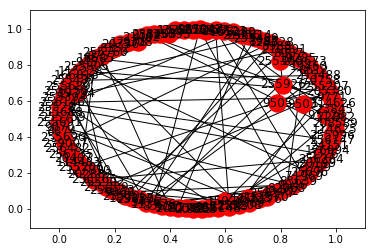

In [242]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
#g1 = nx.petersen_graph()
nx.draw_networkx(H, with_labels= True)
plt.show()

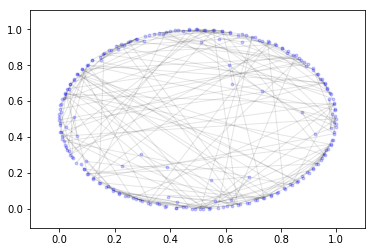

In [244]:
from pylab import show
# create the layout
pos = nx.spring_layout(H)
# draw the nodes and the edges (all)
nx.draw_networkx_nodes(H,pos,node_color='b',alpha=0.2,node_size=8)
nx.draw_networkx_edges(H,pos,alpha=0.1)
plt.show()

**Degree**:

which is defined as the number of links incident upon a node 

In [292]:
degree=sorted(nx.degree(H).values(),reverse=True) #value

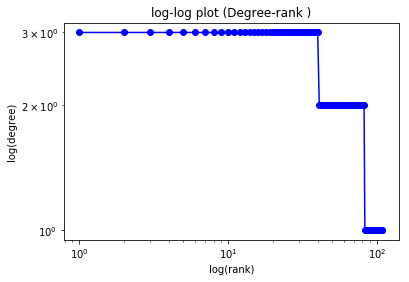

In [291]:
#plot degree in a loglog plot
import matplotlib.pyplot as plt
degree_sequence=sorted(nx.degree(H).values(),reverse=True) # degree sequence
#print "Degree sequence", degree_sequence
dmax=max(degree_sequence)

plt.loglog(degree_sequence,'b-',marker='o')
plt.title("log-log plot (Degree-rank )")
plt.ylabel("log(degree)")
plt.xlabel("log(rank)")
plt.show()

**Betweenness**:

Betweenness centrality quantifies the number of times a node acts as a bridge along the shortest path between two other nodes.

In [267]:
nx.betweenness_centrality(H, k=100, normalized=True, weight="weight", endpoints=False, seed=None)

{3326: 0.0,
 3476: 0.00024460824460824463,
 8350: 0.0,
 8352: 0.0,
 8612: 0.0,
 8757: 0.0,
 8857: 0.0,
 8874: 6.115206115206116e-05,
 8985: 0.0,
 8987: 0.0,
 8988: 0.0,
 9046: 0.000608972608972609,
 9068: 0.0010930930930930934,
 9069: 0.00024460824460824463,
 9070: 0.0,
 9308: 0.0,
 9388: 0.0,
 9451: 3.057603057603058e-05,
 9503: 0.0022626262626262634,
 9505: 0.0,
 9741: 0.0,
 9771: 0.00024460824460824463,
 9772: 0.00024460824460824463,
 13781: 0.0,
 15924: 0.0,
 16585: 0.00024460824460824463,
 17178: 6.115206115206116e-05,
 19285: 0.0,
 19460: 0.0,
 19794: 0.0,
 20199: 0.0,
 20336: 0.0,
 20392: 0.0,
 20405: 0.0,
 20407: 0.0,
 21056: 0.001156793156793157,
 21462: 0.0,
 23845: 0.001156793156793157,
 24151: 0.0,
 25696: 0.0,
 43462: 0.00012230412230412231,
 70758: 0.00019364819364819369,
 71582: 0.00024460824460824463,
 71969: 0.0,
 72882: 0.0010930930930930934,
 72883: 0.000608972608972609,
 73799: 3.057603057603058e-05,
 82068: 0.00012230412230412231,
 83637: 0.0,
 83639: 0.0,
 93126: 

In [271]:
import operator
print(sorted(nx.betweenness_centrality(H, k=100, normalized=True, weight="weight", endpoints=False, seed=None).items(),
            key=operator.itemgetter(1),reverse=True))

[(9503, 0.0022626262626262634), (255926, 0.002262626262626263), (93126, 0.001712257712257713), (255300, 0.0017122577122577127), (23845, 0.001156793156793157), (21056, 0.001156793156793157), (255487, 0.0010930930930930934), (113776, 0.0010930930930930934), (9068, 0.0010930930930930934), (256146, 0.0010930930930930934), (72882, 0.0010930930930930934), (255689, 0.0008357448357448359), (255759, 0.0008357448357448359), (255206, 0.0007287287287287288), (255247, 0.0006089726089726092), (9046, 0.0006089726089726092), (72883, 0.0006089726089726092), (255488, 0.000608972608972609), (256147, 0.000608972608972609), (255207, 0.0004866684866684867), (255690, 0.00037200837200837203), (255760, 0.00037200837200837203), (255328, 0.00036691236691236697), (175195, 0.0003363363363363364), (16585, 0.00024460824460824463), (255280, 0.00024460824460824463), (3476, 0.00024460824460824463), (82068, 0.00024460824460824463), (9069, 0.00024460824460824463), (124828, 0.00024460824460824463), (9771, 0.00024460824460

**Most important** nodes in the *subgraph*

In [251]:
#most important node 
def most_important(G):
        ranking = nx.betweenness_centrality(G).items()
        r = [x[1] for x in ranking]
        m = sum(r)/len(r) # mean centrality
        t = m*3 # threshold, we keep only the nodes with 3 times the mean
        Gt = G.copy()
        for k, v in ranking:
            if v < t:
                Gt.remove_node(k)
        return Gt

In [252]:
Gt=most_important(H)

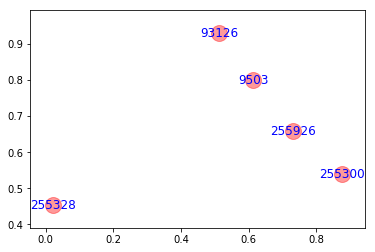

In [253]:
# draw the most important nodes with a different style
nx.draw_networkx_nodes(Gt,pos,node_color='r',alpha=0.4,node_size=254)
# also the labels this time
nx.draw_networkx_labels(Gt,pos,font_size=12,font_color='b')
show()

**Closeness**:

In a connected graph, the normalized closeness centrality (or closeness) of a node is the average length of the shortest path between the node and all other nodes in the graph. Thus the more central a node is, the closer it is to all other nodes.

In [273]:
nx.closeness_centrality(H)

{3326: 0.018018018018018018,
 3476: 0.02702702702702703,
 8350: 0.018018018018018018,
 8352: 0.018018018018018018,
 8612: 0.018018018018018018,
 8757: 0.009009009009009009,
 8857: 0.009009009009009009,
 8874: 0.02702702702702703,
 8985: 0.018018018018018018,
 8987: 0.018018018018018018,
 8988: 0.018018018018018018,
 9046: 0.02702702702702703,
 9068: 0.02702702702702703,
 9069: 0.02702702702702703,
 9070: 0.02702702702702703,
 9308: 0.02702702702702703,
 9388: 0.018018018018018018,
 9451: 0.018018018018018018,
 9503: 0.03843843843843844,
 9505: 0.03203203203203203,
 9741: 0.009009009009009009,
 9771: 0.02702702702702703,
 9772: 0.018018018018018018,
 13781: 0.009009009009009009,
 15924: 0.016216216216216217,
 16585: 0.02702702702702703,
 17178: 0.02702702702702703,
 19285: 0.018018018018018018,
 19460: 0.018018018018018018,
 19794: 0.02702702702702703,
 20199: 0.009009009009009009,
 20336: 0.0,
 20392: 0.009009009009009009,
 20405: 0.009009009009009009,
 20407: 0.009009009009009009,
 21

In [303]:
#top ten nodes!
def get_top_keys(dictionary, top):
    items = sorted(dictionary.items(),reverse=True, key=lambda x: x[1])
    return list(map(lambda x: x[0], items[:top]))

In [304]:
top_clo_cen = get_top_keys(nx.closeness_centrality(H),10)

In [305]:
top_clo_cen

[255926, 9503, 93126, 9505, 255300, 255206, 255207, 16585, 255208, 255405]

In [307]:
clos_graph=H.subgraph(top_clo_cen)

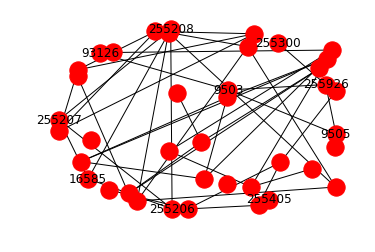

In [312]:
nx.draw_networkx(clos_graph, with_labels= True)
plt.show()

# 2b

In [15]:
#len(G.nodes())
import matplotlib.pyplot as plt
def hopDistance(author,d):
    degreeList =[]
    for node in G.nodes():
        if nx.has_path(G,author,node):
            edges = len(nx.shortest_path(G, source=author, target=node, weight=None)) - 1
            if(edges <= d):
                degreeList.append(node)
    

    H = G.subgraph(degreeList)
    nx.draw_networkx(H, with_labels= True)
    plt.show()

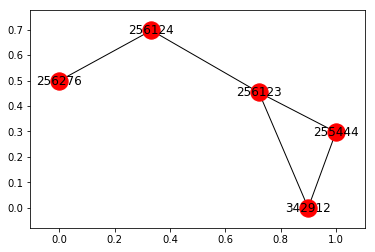

In [16]:
hopDistance(256123,3)

# 3 (erdos)

In [57]:
#len(G.nodes())
import matplotlib.pyplot as plt
def erdosNumber(target_node):
    author = 256123
    degreeList =[]
    if nx.has_path(G,author,target_node):
        length_weight  = nx.shortest_path_length(G, source=author, target=target_node, weight="weight")
    return length_weight

In [58]:
erdosNumber(255444)

1.6666666666666667

In [59]:
nx.shortest_path(G, source=256123, target=255444, weight=None)

[256123, 255444]

In [64]:
G.neighbors(255444)

[256123, 342912]

In [61]:
dict_author_pub[70758]

[{162632: 'clustering rankings in the fourier domain.'}]

In [38]:
dict_author_pub[256124]

[{162307: 'constraint selection for semi-supervised topological clustering.'},
 {162460: 'constrained laplacian score for semi-supervised feature selection.'}]

In [56]:
'''liste =[]
for item in dict_author_pub:
    print (item)
    if(162021 in listToDict(item).keys()):
        liste.append(listToDict(item).keys())'''
    

255206
255207
16585
255208
255280
255281
3326
20405
20407
255339
205380
115228
210891
255394
255395
255405
9308
175195
17178
176994
73799
24151
255487
255488
3476
255489
166813
13781
9741
8757
255537
21462
255578
113776
255247
82068
255673
255688
255689
255690
255691
113346
15924
255814
200773
93126
23845
208589
127810
255902
255926
9503
9505
9068
9046
9069
9070
255950
255996
20199
124828
239007
189237
255823
256123
256124
8985
8987
8988
19285
19460
8612
255494
256146
256147
9771
256148
20336
256176
256177
255328
256188
256159
256133
256264
256265
256276
25696
255805
72882
72883
71582
71969
9772
114626
114625
114483
202882
256135
252278
83637
83639
255300
21056
70758
256482
256500
20392
8857
256366
255759
255760
8874
19794
9451
8350
8352
151570
43462
9388
1632
217858
271609
17344
16239
271610
8819
271611
16249
19355
16145
18433
223848
271612
175489
271613
17368
271614
17611
16521
168357
271615
271616
17509
17973
17974
16665
16837
16867
271623
17824
15938
271632
271633
16483
17423
15815

188302
19747
188405
15044
17127
178852
2067
123405
523880
11538
2068
59593
15040
15043
188367
188417
434795
188453
523883
20242
20682
523884
20270
20856
250148
523891
372427
88604
262466
188035
421547
221860
17697
178169
523910
364992
168549
218188
216251
207568
207194
33495
523914
18502
116101
310211
523916
454906
32198
335904
18353
523925
89252
523926
523397
302848
13948
255327
17629
523783
271923
118885
454725
21152
141492
104368
115048
113291
523938
523939
20505
22877
115647
424871
523951
523952
523953
492461
17661
136655
523963
18778
12574
15899
491425
373557
404014
270518
268204
19855
92693
290330
16767
450961
523974
8854
110757
523979
523981
209752
299912
14949
14871
161698
14936
523311
356372
297719
18713
523999
524000
22312
21245
523506
255925
232300
104764
524009
524010
524015
524016
202497
501840
111859
19780
524018
516905
8048
290394
117272
524023
117939
117273
20351
20050
20052
20670
225979
447719
85420
18529
175623
289262
129893
289264
433820
118526
42016
15258
15257
5642

682687
489079
52905
18436
16388
523426
683366
979
683368
683369
682592
23399
255353
494520
524246
683370
683371
683372
115359
524400
683373
524401
21926
18927
68720
489469
17978
682907
683377
682586
524148
379071
682841
37841
544233
8791
20282
19895
20097
490098
8417
230720
255828
16894
15570
109164
288536
2678
489511
695202
695203
41515
12475
695204
114819
502281
74522
113337
524831
666576
31169
8303
98317
489258
419323
58854
59100
695210
695211
396784
38183
8818
8413
487487
185505
695214
18212
518960
58350
80044
17285
22622
140810
69362
20372
269818
695220
523778
113301
637533
71907
41181
364969
256077
695219
188393
265637
38842
695231
695232
413079
18269
226948
114768
113230
35951
118818
21007
73235
166881
161501
288917
695251
686606
167049
166582
95299
38535
184264
184260
72300
523360
9163
20139
23026
8721
565112
695263
85761
565116
20305
20306
695264
104567
21057
290081
369444
396734
288535
216331
118916
113214
695242
8787
103886
103888
264704
433806
433807
433808
8311
322766
7484

8552
461084
249121
461082
266085
736535
58343
30753
123200
454285
536733
9225
8686
736083
255986
255242
114200
9646
8544
21967
12112
736550
108088
454416
38440
682876
578419
736554
245678
517923
518836
116104
736072
8343
736555
736061
489235
225946
736568
20501
736569
683381
736573
736579
614647
9445
360866
735944
736587
363433
255888
132419
514003
736597
736598
736599
299222
3663
602802
8724
146851
142938
146852
142937
736631
182676
356728
683015
9292
736166
736167
9339
8543
454566
434388
602151
736645
517908
255985
682753
736652
106894
150689
736653
256439
736654
223579
736655
72857
736595
74601
9244
9117
14157
736668
736669
623928
577227
454719
8696
8499
167722
366842
200448
736686
510036
510027
736687
718579
736688
205065
8867
9434
454742
515991
183141
182654
736539
736693
736694
736695
736697
736698
115068
736701
736702
518534
21442
518535
736703
454456
272457
9750
20399
9356
454700
3035
38608
8392
333532
735877
72689
736712
73052
433866
71777
736184
9112
736183
658972
638537
7367

736058
145359
881985
172088
1004
121349
130050
566329
300758
433822
143680
111442
143681
275257
6058
7978
289129
255309
64681
273017
401742
550352
375384
881892
61260
310571
60653
518711
7166
5959
7167
7168
7169
519349
23977
882005
213509
44252
213510
44251
882007
809760
518979
457880
365573
765021
307409
8113
143714
19560
6422
296927
811226
858733
11841
154295
113630
28627
28629
121348
593300
143744
166990
720383
37244
466742
239753
352066
871135
558222
558221
201644
43872
20551
43873
452262
238921
99593
73249
175896
5238
7194
232032
119414
154418
61081
144983
537397
5242
308690
518676
190868
52025
882045
882046
882047
259415
308299
115229
259402
872918
151344
784666
151346
368212
209165
292580
424677
25376
293927
25374
24969
293924
293925
293926
112393
97730
108651
72059
149372
558040
112302
87647
10625
7398
69736
517975
290418
5245
5247
231734
265404
265375
265122
61258
21435
433883
882081
882082
36124
389748
138386
35349
55140
882083
366646
8297
716116
433885
10569
170887
435882
26

### Shortest Path function

In [279]:
graph = {'A': ['B', 'C'],
             'B': ['C', 'D'],
             'C': ['D'],
             'D': ['C'],
             'E': ['F'],
             'F': ['C']}

In [280]:
import networkx as nx

In [281]:
def find_all_paths(graph, start, end, path=[]):
        path = path + [start]
        if start == end:
            return [path]
        if start not in graph:
            return []
        paths = []
        for node in graph[start]:
            if node not in path:
                newpaths = find_all_paths(graph, node, end, path)
                for newpath in newpaths:
                    paths.append(newpath)
        return paths

In [282]:
find_all_paths(graph, 'A', 'D')

[['A', 'B', 'C', 'D'], ['A', 'B', 'D'], ['A', 'C', 'D']]

In [283]:
def find_shortest_path(graph, start, end, path=[]):
        path = path + [start]
        if start == end:
            return path
        if start not in graph:
            return None
        shortest = None
        for node in graph[start]:
            if node not in path:
                newpath = find_shortest_path(graph, node, end, path)
                if newpath:
                    if not shortest or len(newpath) < len(shortest):
                        shortest = newpath
        return shortest

In [284]:
find_shortest_path(graph,'A','D')

['A', 'B', 'D']

In [180]:
graph={'a': {'b': {'w':4}, 'c':{'w':8}, 's':{ 'w':3}},
 'b': {'a':{'w':2}, 'd': {'w':2}, 's': {'w':4}},
 'c': {'a': {'w':2}, 'd': {'w':7}, 't': {'w':4}},
 'd': {'b': {'w':1}, 'c': {'w':11}, 't': {'w':5}},
 's': {'a': {'w':2}, 'b': {'w':1}},
 't': {'c': {'w':3}, 'd': {'w':5}}}

In [157]:
g={'s': {'a': 2, 'b': 1},
'a': {'s': 3, 'b': 4, 'c':8},
'b': {'s': 4, 'a': 2, 'd': 2},
'c': {'a': 2, 'd': 7, 't': 4},
'd': {'b': 1, 'c': 11, 't': 5},
't': {'c': 3, 'd': 5}}

In [158]:
def dijkstra(graph,src,dest,visited=[],distances={},predecessors={}):
    """ calculates a shortest path tree routed in src
    """    
    # a few sanity checks
    if src not in graph:
        raise TypeError('The root of the shortest path tree cannot be found')
    if dest not in graph:
        raise TypeError('The target of the shortest path cannot be found')    
    # ending condition
    if src == dest:
        # We build the shortest path and display it
        path=[]
        pred=dest
        while pred != None:
            path.append(pred)
            pred=predecessors.get(pred,None)
        print('shortest path: '+str(path)+" cost="+str(distances[dest])) 
    else :     
        # if it is the initial  run, initializes the cost
        if not visited: 
            distances[src]=0
        # visit the neighbors
        for neighbor in graph[src] :
            if neighbor not in visited:
                new_distance = distances[src] + graph[src][neighbor]
                if new_distance < distances.get(neighbor,float('inf')):
                    distances[neighbor] = new_distance
                    predecessors[neighbor] = src
        # mark as visited
        visited.append(src)
        # now that all neighbors have been visited: recurse                         
        # select the non visited node with lowest distance 'x'
        # run Dijskstra with src='x'
        unvisited={}
        for k in graph:
            if k not in visited:
                unvisited[k] = distances.get(k,float('inf'))        
        x=min(unvisited, key=unvisited.get)
        dijkstra(graph,x,dest,visited,distances,predecessors)
        


In [159]:
dijkstra(g,'s','t')

shortest path: ['t', 'd', 'b', 's'] cost=8


In [200]:
print(nx.dijkstra_path(G,255444,342912,weight='weight'))

[255444, 342912]


In [207]:
from heapq import heappush, heappop
from itertools import count

import networkx as nx

def k_shortest_paths(G, source, target, k=1, weight='weight'):
    """Returns the k-shortest paths from source to target in a weighted graph G.
    Parameters
    ----------
    G : NetworkX graph
    source : node
       Starting node
    target : node
       Ending node
       
    k : integer, optional (default=1)
        The number of shortest paths to find
    weight: string, optional (default='weight')
       Edge data key corresponding to the edge weight
    Returns
    -------
    lengths, paths : lists
       Returns a tuple with two lists.
       The first list stores the length of each k-shortest path.
       The second list stores each k-shortest path.  
    Raises
    ------
    NetworkXNoPath
       If no path exists between source and target.
    Examples
    --------
    >>> G=nx.complete_graph(5)    
    >>> print(k_shortest_paths(G, 0, 4, 4))
    ([1, 2, 2, 2], [[0, 4], [0, 1, 4], [0, 2, 4], [0, 3, 4]])
    Notes
    ------
    Edge weight attributes must be numerical and non-negative.
    Distances are calculated as sums of weighted edges traversed.
    """
    if source == target:
        return ([0], [[source]]) 
       
    length, path = nx.single_source_dijkstra(G, source, target, weight=weight)
    if target not in length:
        raise nx.NetworkXNoPath("node %s not reachable from %s" % (source, target))
        
    lengths = [length[target]]
    paths = [path[target]]
    c = count()        
    B = []                        
    G_original = G.copy()    
    
    for i in range(1, k):
        for j in range(len(paths[-1]) - 1):            
            spur_node = paths[-1][j]
            root_path = paths[-1][:j + 1]
            
            edges_removed = []
            for c_path in paths:
                if len(c_path) > j and root_path == c_path[:j + 1]:
                    u = c_path[j]
                    v = c_path[j + 1]
                    if G.has_edge(u, v):
                        edge_attr = G.edge[u][v]
                        G.remove_edge(u, v)
                        edges_removed.append((u, v, edge_attr))
            
            for n in range(len(root_path) - 1):
                node = root_path[n]
                # out-edges
                for u, v, edge_attr in G.edges_iter(node, data=True):
                    G.remove_edge(u, v)
                    edges_removed.append((u, v, edge_attr))
                
                if G.is_directed():
                    # in-edges
                    for u, v, edge_attr in G.in_edges_iter(node, data=True):
                        G.remove_edge(u, v)
                        edges_removed.append((u, v, edge_attr))
            
            spur_path_length, spur_path = nx.single_source_dijkstra(G, spur_node, target, weight=weight)            
            if target in spur_path and spur_path[target]:
                total_path = root_path[:-1] + spur_path[target]
                total_path_length = get_path_length(G_original, root_path, weight) + spur_path_length[target]                
                heappush(B, (total_path_length, next(c), total_path))
                
            for e in edges_removed:
                u, v, edge_attr = e
                G.add_edge(u, v, edge_attr)
                       
        if B:
            (l, _, p) = heappop(B)        
            lengths.append(l)
            paths.append(p)
        else:
            break
    
    return (lengths, paths)

def get_path_length(G, path, weight='weight'):
    length = 0
    if len(path) > 1:
        for i in range(len(path) - 1):
            u = path[i]
            v = path[i + 1]
            
            length += G.edge[u][v].get(weight, 1)
    
    return length    
    

In [211]:
k_shortest_paths(G,255444, 342912,weight='weight')

([0.0], [[255444, 342912]])

In [260]:
def _single_source_dijkstra_path_basic(G, s, weight):
    # modified from Eppstein
    S = []
    P = {}
    for v in G:
        P[v] = []
    sigma = dict.fromkeys(G, 0.0)    # sigma[v]=0 for v in G
    D = {}
    sigma[s] = 1.0
    push = heappush
    pop = heappop
    seen = {s: 0}
    c = count()
    Q = []   # use Q as heap with (distance,node id) tuples
    push(Q, (0, next(c), s, s))
    while Q:
        (dist, _, pred, v) = pop(Q)
        if v in D:
            continue  # already searched this node.
        sigma[v] += sigma[pred]  # count paths
        S.append(v)
        D[v] = dist
        for w, edgedata in G[v].items():
            vw_dist = dist + edgedata.get(weight, 1)
            if w not in D and (w not in seen or vw_dist < seen[w]):
                seen[w] = vw_dist
                push(Q, (vw_dist, next(c), v, w))
                sigma[w] = 0.0
                P[w] = [v]
            elif vw_dist == seen[w]:  # handle equal paths
                sigma[w] += sigma[v]
                P[w].append(v)
    return S, P, sigma

In [261]:
_single_source_dijkstra_path_basic(G,342912)

NameError: name 'single_source_dijkstra_path_basic' is not defined

In [263]:
_single_source_dijkstra_path_basic(G,342912,weight='weight')

([342912, 255444, 256123, 256124, 256276],
 {255206: [],
  255207: [],
  16585: [],
  255208: [],
  255280: [],
  255281: [],
  3326: [],
  20405: [],
  20407: [],
  255339: [],
  205380: [],
  115228: [],
  210891: [],
  255394: [],
  255395: [],
  255405: [],
  9308: [],
  175195: [],
  17178: [],
  176994: [],
  73799: [],
  24151: [],
  255487: [],
  255488: [],
  3476: [],
  255489: [],
  166813: [],
  13781: [],
  9741: [],
  8757: [],
  255537: [],
  21462: [],
  113776: [],
  255247: [],
  82068: [],
  255673: [],
  255688: [],
  255689: [],
  255690: [],
  255691: [],
  255814: [],
  200773: [],
  93126: [],
  23845: [],
  208589: [],
  127810: [],
  255902: [],
  255926: [],
  9503: [],
  9505: [],
  9068: [],
  9046: [],
  9069: [],
  9070: [],
  255996: [],
  20199: [],
  124828: [],
  239007: [],
  189237: [],
  256123: [342912, 255444],
  256124: [256123],
  8985: [],
  8987: [],
  8988: [],
  19285: [],
  19460: [],
  8612: [],
  256146: [],
  256147: [],
  9771: [],
  2